<a href="https://colab.research.google.com/github/DaliaEl-Sayed/DEPI---Generative-AI-Track-Tasks./blob/main/EDA_on_Salaries_Dataset_Task_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data Loading from Drive

In [53]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow.keras import backend as K
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error


#https://drive.google.com/file/d/1v54nqQoexM00y0X6CqkEwV_aHIPMq11r/view?usp=sharing
file_id = '1v54nqQoexM00y0X6CqkEwV_aHIPMq11r'
url = f'https://drive.google.com/uc?export=download&id={file_id}'


df = pd.read_csv(url)

In [54]:
print(df.head())

   Id       EmployeeName                                        JobTitle  \
0   1     NATHANIEL FORD  GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY   
1   2       GARY JIMENEZ                 CAPTAIN III (POLICE DEPARTMENT)   
2   3     ALBERT PARDINI                 CAPTAIN III (POLICE DEPARTMENT)   
3   4  CHRISTOPHER CHONG            WIRE ROPE CABLE MAINTENANCE MECHANIC   
4   5    PATRICK GARDNER    DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)   

     BasePay  OvertimePay   OtherPay  Benefits   TotalPay  TotalPayBenefits  \
0  167411.18         0.00  400184.25       NaN  567595.43         567595.43   
1  155966.02    245131.88  137811.38       NaN  538909.28         538909.28   
2  212739.13    106088.18   16452.60       NaN  335279.91         335279.91   
3   77916.00     56120.71  198306.90       NaN  332343.61         332343.61   
4  134401.60      9737.00  182234.59       NaN  326373.19         326373.19   

   Year  Notes         Agency  Status  
0  2011    NaN  San Francisc

#EDA

In [55]:
print(f'Shape of the DataFrame: {df.shape}')

Shape of the DataFrame: (148654, 13)


In [56]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148654 non-null  int64  
 1   EmployeeName      148654 non-null  object 
 2   JobTitle          148654 non-null  object 
 3   BasePay           148045 non-null  float64
 4   OvertimePay       148650 non-null  float64
 5   OtherPay          148650 non-null  float64
 6   Benefits          112491 non-null  float64
 7   TotalPay          148654 non-null  float64
 8   TotalPayBenefits  148654 non-null  float64
 9   Year              148654 non-null  int64  
 10  Notes             0 non-null       float64
 11  Agency            148654 non-null  object 
 12  Status            0 non-null       float64
dtypes: float64(8), int64(2), object(3)
memory usage: 14.7+ MB
None


#Data Preprocessing

In [57]:
# Get the count of each unique value in the 'column_name' column
value_counts = df['JobTitle'].value_counts()

# Print the value counts
print(value_counts)

JobTitle
Transit Operator                                  7036
Special Nurse                                     4389
Registered Nurse                                  3736
Public Svc Aide-Public Works                      2518
Police Officer 3                                  2421
                                                  ... 
CHIEF HOUSING INSPECTOR                              1
TRAFFIC SIGNAL OPERATOR                              1
COURT COMPUTER FACILITIES COORDINATOR                1
AUTOMOTIVE BODY AND FENDER WORKER SUPERVISOR I       1
VICTIM & WITNESS TECHNICIAN                          1
Name: count, Length: 2159, dtype: int64


In [58]:
df = df.dropna(axis=1, how='all')


In [59]:
print(f'Shape of the DataFrame after dropping empty column: {df.shape}')
print("---------------------------------------------------------------")
print(df.info())

Shape of the DataFrame after dropping empty column: (148654, 11)
---------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148654 non-null  int64  
 1   EmployeeName      148654 non-null  object 
 2   JobTitle          148654 non-null  object 
 3   BasePay           148045 non-null  float64
 4   OvertimePay       148650 non-null  float64
 5   OtherPay          148650 non-null  float64
 6   Benefits          112491 non-null  float64
 7   TotalPay          148654 non-null  float64
 8   TotalPayBenefits  148654 non-null  float64
 9   Year              148654 non-null  int64  
 10  Agency            148654 non-null  object 
dtypes: float64(6), int64(2), object(3)
memory usage: 12.5+ MB
None


In [60]:
df.drop(['Id', 'EmployeeName', 'Agency'], axis=1, inplace=True)

<ipython-input-60-190ab8611882>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['Id', 'EmployeeName', 'Agency'], axis=1, inplace=True)


In [61]:
print(f'Shape of the DataFrame after dropping empty column: {df.shape}')
print("---------------------------------------------------------------")
print(df.info())

Shape of the DataFrame after dropping empty column: (148654, 8)
---------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   JobTitle          148654 non-null  object 
 1   BasePay           148045 non-null  float64
 2   OvertimePay       148650 non-null  float64
 3   OtherPay          148650 non-null  float64
 4   Benefits          112491 non-null  float64
 5   TotalPay          148654 non-null  float64
 6   TotalPayBenefits  148654 non-null  float64
 7   Year              148654 non-null  int64  
dtypes: float64(6), int64(1), object(1)
memory usage: 9.1+ MB
None


In [62]:
#split JobTitle to Job and Department
df[['job', 'department']] = df['JobTitle'].str.split('(', expand=True)
df.drop('JobTitle', axis=1, inplace=True)

In [63]:
# Replacing missing department values with 'Other'
df['department'] = df['department'].fillna('Other')

In [64]:
print(f'Shape of the DataFrame after splitting JobTitle column: {df.shape}')
print("-------------------------------------------------------------------")
print(df.info())

Shape of the DataFrame after splitting JobTitle column: (148654, 9)
-------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   BasePay           148045 non-null  float64
 1   OvertimePay       148650 non-null  float64
 2   OtherPay          148650 non-null  float64
 3   Benefits          112491 non-null  float64
 4   TotalPay          148654 non-null  float64
 5   TotalPayBenefits  148654 non-null  float64
 6   Year              148654 non-null  int64  
 7   job               148654 non-null  object 
 8   department        148654 non-null  object 
dtypes: float64(6), int64(1), object(2)
memory usage: 10.2+ MB
None


In [65]:
# Encoding job titles and departments
label_encoder = LabelEncoder()
df['Job_encoded'] = label_encoder.fit_transform(df['job'])
df['Department_encoded'] = label_encoder.fit_transform(df['department'])

# Dropping original columns
df.drop(['job', 'department'], axis=1, inplace=True)


In [66]:
print(f'Shape of the DataFrame after encoding: {df.shape}')
print("--------------------------------------------------")
print(df.info())

Shape of the DataFrame after encoding: (148654, 9)
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   BasePay             148045 non-null  float64
 1   OvertimePay         148650 non-null  float64
 2   OtherPay            148650 non-null  float64
 3   Benefits            112491 non-null  float64
 4   TotalPay            148654 non-null  float64
 5   TotalPayBenefits    148654 non-null  float64
 6   Year                148654 non-null  int64  
 7   Job_encoded         148654 non-null  int64  
 8   Department_encoded  148654 non-null  int64  
dtypes: float64(6), int64(3)
memory usage: 10.2 MB
None


In [67]:
# Convert columns with numeric data types to numeric
numeric_cols = df.select_dtypes(include=['int', 'float']).columns
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric)

In [68]:
print(f'Shape of the DataFrame after encoding: {df.shape}')
print("--------------------------------------------------")
print(df.info())

Shape of the DataFrame after encoding: (148654, 9)
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   BasePay             148045 non-null  float64
 1   OvertimePay         148650 non-null  float64
 2   OtherPay            148650 non-null  float64
 3   Benefits            112491 non-null  float64
 4   TotalPay            148654 non-null  float64
 5   TotalPayBenefits    148654 non-null  float64
 6   Year                148654 non-null  int64  
 7   Job_encoded         148654 non-null  int64  
 8   Department_encoded  148654 non-null  int64  
dtypes: float64(6), int64(3)
memory usage: 10.2 MB
None


In [69]:
print(df.head())

     BasePay  OvertimePay   OtherPay  Benefits   TotalPay  TotalPayBenefits  \
0  167411.18         0.00  400184.25       NaN  567595.43         567595.43   
1  155966.02    245131.88  137811.38       NaN  538909.28         538909.28   
2  212739.13    106088.18   16452.60       NaN  335279.91         335279.91   
3   77916.00     56120.71  198306.90       NaN  332343.61         332343.61   
4  134401.60      9737.00  182234.59       NaN  326373.19         326373.19   

   Year  Job_encoded  Department_encoded  
0  2011          831                   9  
1  2011          293                  10  
2  2011          293                  10  
3  2011         2125                   9  
4  2011          576                   5  


In [70]:
# Missing Data Analysis
print(f'Missing values per column:\n{df.isna().sum()}')
print("----------------------------------------")
print(f'Percentage of missing values per column:\n{df.isna().mean() * 100}')

Missing values per column:
BasePay                 609
OvertimePay               4
OtherPay                  4
Benefits              36163
TotalPay                  0
TotalPayBenefits          0
Year                      0
Job_encoded               0
Department_encoded        0
dtype: int64
----------------------------------------
Percentage of missing values per column:
BasePay                0.409676
OvertimePay            0.002691
OtherPay               0.002691
Benefits              24.326961
TotalPay               0.000000
TotalPayBenefits       0.000000
Year                   0.000000
Job_encoded            0.000000
Department_encoded     0.000000
dtype: float64


In [71]:
#Handle missing values in Benefits
df.loc[df['TotalPay'] == df['TotalPayBenefits'], 'Benefits'] = 0

In [72]:
print(f'Missing values per column:\n{df.isna().sum()}')

Missing values per column:
BasePay               609
OvertimePay             4
OtherPay                4
Benefits                0
TotalPay                0
TotalPayBenefits        0
Year                    0
Job_encoded             0
Department_encoded      0
dtype: int64


In [73]:
#show nulls in OvertimePay and OtherPay
rows_with_null_overtime = df[df['OvertimePay'].isna()]
print(f'The rows where OvertimePay is null:\n{rows_with_null_overtime}')

rows_with_null_overtime = df[df['OtherPay'].isna()]
print(f'The rows where OtherPay is null:\n{rows_with_null_overtime}')

The rows where OvertimePay is null:
        BasePay  OvertimePay  OtherPay  Benefits  TotalPay  TotalPayBenefits  \
148646      NaN          NaN       NaN       0.0       0.0               0.0   
148650      NaN          NaN       NaN       0.0       0.0               0.0   
148651      NaN          NaN       NaN       0.0       0.0               0.0   
148652      NaN          NaN       NaN       0.0       0.0               0.0   

        Year  Job_encoded  Department_encoded  
148646  2014         1274                   9  
148650  2014         1274                   9  
148651  2014         1274                   9  
148652  2014         1274                   9  
The rows where OtherPay is null:
        BasePay  OvertimePay  OtherPay  Benefits  TotalPay  TotalPayBenefits  \
148646      NaN          NaN       NaN       0.0       0.0               0.0   
148650      NaN          NaN       NaN       0.0       0.0               0.0   
148651      NaN          NaN       NaN       0.0  

In [74]:
#Delete the rows where OvertimePay is null
df = df.dropna(subset=['OvertimePay'])
print(f'The shape of the DataFrame after deleting the rows: {df.shape}')
print(f'Missing values per column:\n{df.isna().sum()}')

The shape of the DataFrame after deleting the rows: (148650, 9)
Missing values per column:
BasePay               605
OvertimePay             0
OtherPay                0
Benefits                0
TotalPay                0
TotalPayBenefits        0
Year                    0
Job_encoded             0
Department_encoded      0
dtype: int64


In [75]:
#Get the minimum and maximum values for the entire dataset
min_values = df.min()
max_values = df.max()

print(f'Minimum values:\n{min_values}')
print("------------------------------")
print("------------------------------")
print(f'Maximum values:\n{max_values}')


Minimum values:
BasePay               -166.01
OvertimePay             -0.01
OtherPay             -7058.59
Benefits               -33.89
TotalPay              -618.13
TotalPayBenefits      -618.13
Year                  2011.00
Job_encoded              0.00
Department_encoded       0.00
dtype: float64
------------------------------
------------------------------
Maximum values:
BasePay               319275.01
OvertimePay           245131.88
OtherPay              400184.25
Benefits               96570.66
TotalPay              567595.43
TotalPayBenefits      567595.43
Year                    2014.00
Job_encoded             2158.00
Department_encoded        14.00
dtype: float64


In [76]:
# 5. Find the percentage of positive, 0, and negative values for relevant columns
columns = ['BasePay', 'OvertimePay', 'OtherPay', 'Benefits', 'TotalPay', 'TotalPayBenefits']

for col in columns:
    positive_count = (df[col] > 0).sum()
    zero_count = (df[col] == 0).sum()
    negative_count = (df[col] < 0).sum()

    total_count = len(df)

    positive_percentage = (positive_count / total_count) * 100
    zero_percentage = (zero_count / total_count) * 100
    negative_percentage = (negative_count / total_count) * 100

    print(f'Percentage of positive values in {col}: {positive_percentage:.2f}%')
    print(f'Percentage of zero values in {col}: {zero_percentage:.2f}%')
    print(f'Percentage of negative values in {col}: {negative_percentage:.2f}%')
    print()

Percentage of positive values in BasePay: 98.71%
Percentage of zero values in BasePay: 0.87%
Percentage of negative values in BasePay: 0.01%

Percentage of positive values in OvertimePay: 47.98%
Percentage of zero values in OvertimePay: 52.02%
Percentage of negative values in OvertimePay: 0.00%

Percentage of positive values in OtherPay: 72.01%
Percentage of zero values in OtherPay: 27.99%
Percentage of negative values in OtherPay: 0.00%

Percentage of positive values in Benefits: 74.51%
Percentage of zero values in Benefits: 25.49%
Percentage of negative values in Benefits: 0.00%

Percentage of positive values in TotalPay: 99.75%
Percentage of zero values in TotalPay: 0.24%
Percentage of negative values in TotalPay: 0.00%

Percentage of positive values in TotalPayBenefits: 99.98%
Percentage of zero values in TotalPayBenefits: 0.02%
Percentage of negative values in TotalPayBenefits: 0.00%



In [77]:
columns = ['BasePay', 'OvertimePay', 'OtherPay', 'Benefits', 'TotalPay', 'TotalPayBenefits']

for col in columns:
    df = df[df[col] >= 0]

In [78]:
# 5. Find the percentage of positive, 0, and negative values for relevant columns
columns = ['BasePay', 'OvertimePay', 'OtherPay', 'Benefits', 'TotalPay', 'TotalPayBenefits']

for col in columns:
    positive_count = (df[col] > 0).sum()
    zero_count = (df[col] == 0).sum()
    negative_count = (df[col] < 0).sum()

    total_count = len(df)

    positive_percentage = (positive_count / total_count) * 100
    zero_percentage = (zero_count / total_count) * 100
    negative_percentage = (negative_count / total_count) * 100

    print(f'Percentage of positive values in {col}: {positive_percentage:.2f}%')
    print(f'Percentage of zero values in {col}: {zero_percentage:.2f}%')
    print(f'Percentage of negative values in {col}: {negative_percentage:.2f}%')
    print()

Percentage of positive values in BasePay: 99.12%
Percentage of zero values in BasePay: 0.88%
Percentage of negative values in BasePay: 0.00%

Percentage of positive values in OvertimePay: 48.17%
Percentage of zero values in OvertimePay: 51.83%
Percentage of negative values in OvertimePay: 0.00%

Percentage of positive values in OtherPay: 72.10%
Percentage of zero values in OtherPay: 27.90%
Percentage of negative values in OtherPay: 0.00%

Percentage of positive values in Benefits: 74.50%
Percentage of zero values in Benefits: 25.50%
Percentage of negative values in Benefits: 0.00%

Percentage of positive values in TotalPay: 99.95%
Percentage of zero values in TotalPay: 0.05%
Percentage of negative values in TotalPay: 0.00%

Percentage of positive values in TotalPayBenefits: 99.98%
Percentage of zero values in TotalPayBenefits: 0.02%
Percentage of negative values in TotalPayBenefits: 0.00%



In [79]:
# Drop the rows where TotalPay is 0
df = df[df['TotalPay'] != 0]

In [80]:
# 5. Find the percentage of positive, 0, and negative values for relevant columns
columns = ['BasePay', 'OvertimePay', 'OtherPay', 'Benefits', 'TotalPay', 'TotalPayBenefits']

for col in columns:
    positive_count = (df[col] > 0).sum()
    zero_count = (df[col] == 0).sum()
    negative_count = (df[col] < 0).sum()

    total_count = len(df)

    positive_percentage = (positive_count / total_count) * 100
    zero_percentage = (zero_count / total_count) * 100
    negative_percentage = (negative_count / total_count) * 100

    print(f'Percentage of positive values in {col}: {positive_percentage:.2f}%')
    print(f'Percentage of zero values in {col}: {zero_percentage:.2f}%')
    print(f'Percentage of negative values in {col}: {negative_percentage:.2f}%')
    print()

Percentage of positive values in BasePay: 99.18%
Percentage of zero values in BasePay: 0.82%
Percentage of negative values in BasePay: 0.00%

Percentage of positive values in OvertimePay: 48.20%
Percentage of zero values in OvertimePay: 51.80%
Percentage of negative values in OvertimePay: 0.00%

Percentage of positive values in OtherPay: 72.14%
Percentage of zero values in OtherPay: 27.86%
Percentage of negative values in OtherPay: 0.00%

Percentage of positive values in Benefits: 74.50%
Percentage of zero values in Benefits: 25.50%
Percentage of negative values in Benefits: 0.00%

Percentage of positive values in TotalPay: 100.00%
Percentage of zero values in TotalPay: 0.00%
Percentage of negative values in TotalPay: 0.00%

Percentage of positive values in TotalPayBenefits: 100.00%
Percentage of zero values in TotalPayBenefits: 0.00%
Percentage of negative values in TotalPayBenefits: 0.00%



In [81]:
#Get the minimum and maximum values for the entire dataset
min_values = df.min()
max_values = df.max()

print(f'Minimum values:\n{min_values}')
print("------------------------------")
print("------------------------------")
print(f'Maximum values:\n{max_values}')


Minimum values:
BasePay                  0.0
OvertimePay              0.0
OtherPay                 0.0
Benefits                 0.0
TotalPay                 0.3
TotalPayBenefits         0.3
Year                  2011.0
Job_encoded              0.0
Department_encoded       0.0
dtype: float64
------------------------------
------------------------------
Maximum values:
BasePay               319275.01
OvertimePay           245131.88
OtherPay              400184.25
Benefits               96570.66
TotalPay              567595.43
TotalPayBenefits      567595.43
Year                    2014.00
Job_encoded             2158.00
Department_encoded        14.00
dtype: float64


In [82]:
print(f'The shape of the DataFrame after deleting the rows: {df.shape}')
df.info()

The shape of the DataFrame after deleting the rows: (147951, 9)
<class 'pandas.core.frame.DataFrame'>
Index: 147951 entries, 0 to 148625
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   BasePay             147951 non-null  float64
 1   OvertimePay         147951 non-null  float64
 2   OtherPay            147951 non-null  float64
 3   Benefits            147951 non-null  float64
 4   TotalPay            147951 non-null  float64
 5   TotalPayBenefits    147951 non-null  float64
 6   Year                147951 non-null  int64  
 7   Job_encoded         147951 non-null  int64  
 8   Department_encoded  147951 non-null  int64  
dtypes: float64(6), int64(3)
memory usage: 11.3 MB


train a model to predict the missing values

In [83]:
"""  another way to get nulls in benifits without useing total pay column
# Split the DataFrame into features and target
X = data.drop('Benefits', axis=1)
y = data['Benefits']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest Regressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, predictions)
print('Mean Absolute Error:', mae) """

"  another way to get nulls in benifits without useing total pay column\n# Split the DataFrame into features and target\nX = data.drop('Benefits', axis=1)\ny = data['Benefits']\n\n# Split the data into training and testing sets\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)\n\n# Create a Random Forest Regressor model\nmodel = RandomForestRegressor(n_estimators=100, random_state=42)\n\n# Train the model\nmodel.fit(X_train, y_train)\n\n# Make predictions on the test set\npredictions = model.predict(X_test)\n\n# Evaluate the model\nmae = mean_absolute_error(y_test, predictions)\nprint('Mean Absolute Error:', mae) "

In [84]:
"""
from sklearn.metrics import r2_score

# Calculate R2 score
r2 = r2_score(y_test, predictions)
print('R-squared Score:', r2) """

"\nfrom sklearn.metrics import r2_score\n\n# Calculate R2 score\nr2 = r2_score(y_test, predictions)\nprint('R-squared Score:', r2) "

In [85]:
"""
# Use the trained model to predict the missing values in the 'Benefits' column
df['Benefits_predicted'] = model.predict(df[X.columns])

# Fill the missing values in the 'Benefits' column with the predicted values
df['Benefits'].fillna(df['Benefits_predicted'], inplace=True)

# Drop the 'Benefits_predicted' column
df.drop('Benefits_predicted', axis=1, inplace=True)

# Check for missing values
df.isnull().sum() """


"\n# Use the trained model to predict the missing values in the 'Benefits' column\ndf['Benefits_predicted'] = model.predict(df[X.columns])\n\n# Fill the missing values in the 'Benefits' column with the predicted values\ndf['Benefits'].fillna(df['Benefits_predicted'], inplace=True)\n\n# Drop the 'Benefits_predicted' column\ndf.drop('Benefits_predicted', axis=1, inplace=True)\n\n# Check for missing values\ndf.isnull().sum() "

#Modeling

In [86]:

from sklearn.preprocessing import StandardScaler
def r_squared(y_true, y_pred):
    SS_res = K.sum(K.square(y_true - y_pred))
    SS_tot = K.sum(K.square(y_true - K.mean(y_true)))
    return (1 - SS_res/(SS_tot + K.epsilon()))

# Separate features and target
X = df.drop('TotalPay', axis=1)
y = df['TotalPay']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Define the ANN model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(16, activation='relu', input_shape=(X_train.shape[1],)))
model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(tf.keras.layers.Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=[r_squared])


In [87]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 16)                144       
                                                                 
 dense_10 (Dense)            (None, 32)                544       
                                                                 
 dense_11 (Dense)            (None, 1)                 33        
                                                                 
Total params: 721 (2.82 KB)
Trainable params: 721 (2.82 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


#Training

In [88]:

# Train the model
history = model.fit(X_train, y_train,validation_split=0.5, epochs=20, batch_size=128)


Epoch 1/20
463/463 [==============================] - 3s 5ms/step - loss: 8151912960.0000 - r_squared: -2.2594 - val_loss: 8049731072.0000 - val_r_squared: -2.2319
Epoch 2/20
463/463 [==============================] - 2s 4ms/step - loss: 7691668480.0000 - r_squared: -2.0764 - val_loss: 7156911616.0000 - val_r_squared: -1.8753
Epoch 3/20
463/463 [==============================] - 1s 3ms/step - loss: 6286467072.0000 - r_squared: -1.5214 - val_loss: 5307592704.0000 - val_r_squared: -1.1365
Epoch 4/20
463/463 [==============================] - 1s 3ms/step - loss: 4233907200.0000 - r_squared: -0.7014 - val_loss: 3244975872.0000 - val_r_squared: -0.3110
Epoch 5/20
463/463 [==============================] - 1s 3ms/step - loss: 2466886400.0000 - r_squared: 0.0067 - val_loss: 1892988160.0000 - val_r_squared: 0.2327
Epoch 6/20
463/463 [==============================] - 1s 3ms/step - loss: 1535610496.0000 - r_squared: 0.3803 - val_loss: 1308149632.0000 - val_r_squared: 0.4702
Epoch 7/20
463/463 [

#Evaluation

In [89]:
r2_score = history.history['r_squared'][-1]
print('R-squared Score:', r2_score)

R-squared Score: 0.9799124598503113


925/925 [==============================] - 1s 1ms/step - loss: 48929332.0000 - r_squared: 0.9790
Test loss: [48929332.0, 0.9789990782737732]
925/925 [==============================] - 1s 1ms/step


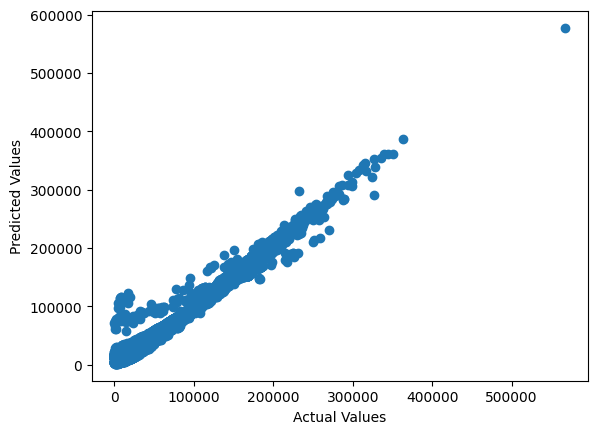

In [90]:
# Evaluate the model
loss = model.evaluate(X_test, y_test)
print('Test loss:', loss)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Plot the actual and predicted values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

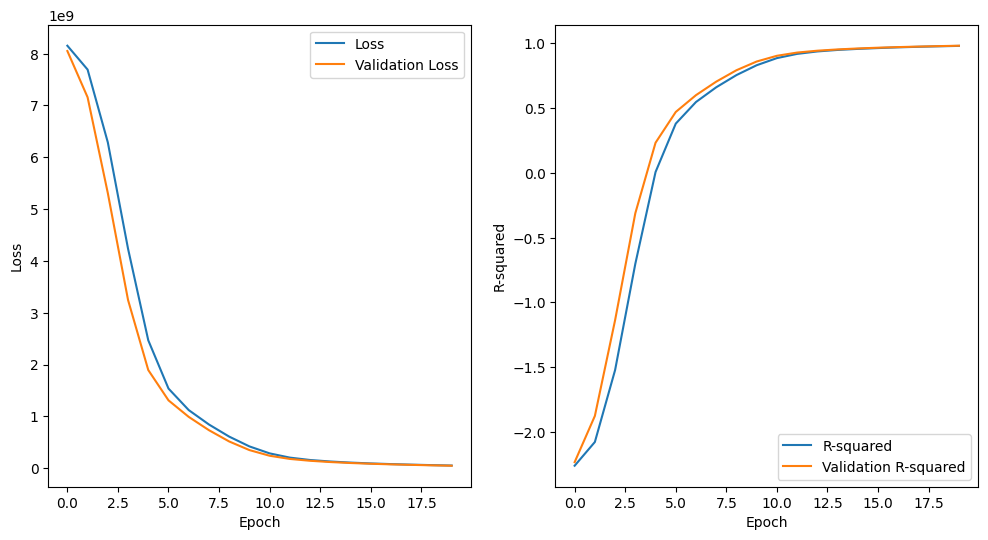

In [91]:
#Plot the loss and accuracy curves
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['r_squared'], label='R-squared')
plt.plot(history.history['val_r_squared'], label='Validation R-squared')
plt.xlabel('Epoch')
plt.ylabel('R-squared')
plt.legend()

plt.show()